<a href="https://colab.research.google.com/github/wldhksqk/simjiwan1/blob/main/%EC%8B%AC%EC%A7%80%EC%99%849%EA%B0%9510%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=fe9776addb67c21b09eab235710a11ac898154d2a1f41f7e245d13595b2f9fcf
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [2]:
pip install joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import mglearn

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [5]:
import seaborn as sns

# **선형 모델**

모델을 ^f(X) = wX+b로 표현

주어진 featrue를 가장 잘 추종하는 선형 함수를 회귀를 통해 찾음

feature들의 수가 많을 때 잘 맞는다.

w를 weight, b를 bias로 부른다.

# 결국 추측한 값과 실제 값의 차이가 작아지도록 w와 b를 찾는 것

모델에 매개 변수가 없다

KNN같은 경우는 이웃의 수가 매개변수 였음

# **Sklearn 구현**

data가져오기. mglearn.datasets.make_wave이용

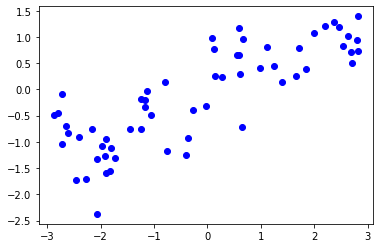

In [45]:
X, y = mglearn.datasets.make_wave(n_samples=60) #샘플이 60개
plt.plot(X,y, 'bo')

In [46]:
#Test/train set 분리하기
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
#Linear regression 모델 불러오기
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
#Weight랑 bias 확인하기
print("weight : ", lr.coef_)
print("bias : ", lr.intercept_)

weight :  [0.39390555]
bias :  -0.031804343026759746


In [51]:
#Accuracy(정확도) 확인하기
print("train Accuracy : {:.2f}".format(lr.score(X_train,y_train))) # 67% 만족
print("test Accuracy : {:.2f}".format(lr.score(X_test,y_test))) # 66% 만족

train Accuracy : 0.67
test Accuracy : 0.66


# **보스턴 부동산 가격 set에서 테스트 하기.**

# feature 수가 104(근데 보스턴 셋 불러오면 13개임;;)

# sample수는 506개 

In [80]:
from sklearn.datasets import load_boston

In [77]:
boston = load_boston()# boston 데이타셋 로드

In [114]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)# boston 데이타셋 DataFrame 변환
df['price'] = boston.target

In [ ]:
sns.distplot(df['price'])

In [107]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)

In [120]:
X.shape #feature가 13개밖에 안됨... 영상에선 104개 ㄷㄷ;;;

(506, 13)

In [118]:
y = df['price']

In [121]:
y.shape

(506,)

In [154]:
#Test/train set 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [124]:
#fitting 하기
lr = LinearRegression().fit(X_train,y_train)

In [125]:
print("train Accuracy : {:.2f}".format(lr.score(X_train,y_train))) 
print("test Accuracy : {:.2f}".format(lr.score(X_test,y_test))) 

train Accuracy : 0.77
test Accuracy : 0.64


**영상에선 오버피팅으로 나왔지만 여기선 나름 합리적인 최적화가 이루어졌다고 판단**

**합리적이라기엔 수치가 조금 낮긴한데 그래도 오버피팅은 아님**

**feature 수가 많으면 복잡한 모델이 되는데, 이 경우에는 
104개가 아닌 13개였으니까 이렇게 나왔을 것이다.**

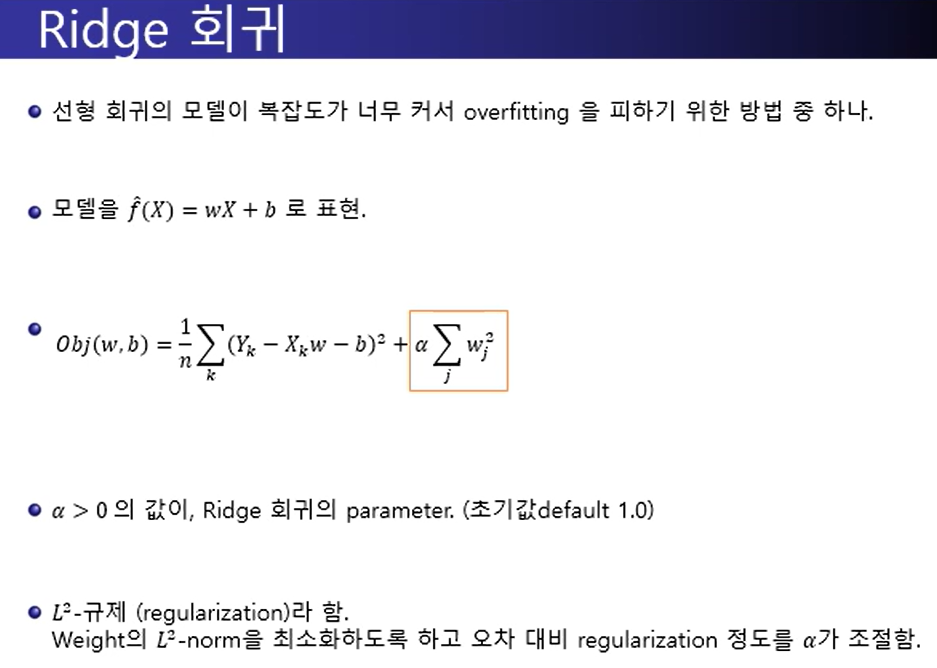

# 둘다 W(weight)를 건드려서 오버피팅을 줄인다

In [130]:
from sklearn.linear_model import Ridge #처음부터 Ridge를 가져오면 알아서 한다

In [182]:
ridge = Ridge().fit(X_train, y_train)

In [133]:
print("train Accuracy : {:.4f}".format(ridge.score(X_train,y_train))) 
print("test Accuracy : {:.4f}".format(ridge.score(X_test,y_test))) 
#트레인이랑 테스트 둘다 떨어진 모습
#영상에선 픽쳐를 잡아줌으로써 트레인은 줄이고 테스트는 올려서 최적화에 좀 맞춘 모습으로 나온다
#이건 모델 파라미터 디폴트 값이 1인 기본적인 경우다

train Accuracy : 0.7679
test Accuracy : 0.6266


In [134]:
#이전 선형 모델의 경우
print("train Accuracy : {:.2f}".format(lr.score(X_train,y_train))) 
print("test Accuracy : {:.2f}".format(lr.score(X_test,y_test))) 

train Accuracy : 0.77
test Accuracy : 0.64


In [137]:
#model parameter 설정하기 원래 디폴트 값은 1임
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("train Accuracy : {:.4f}".format(ridge.score(X_train,y_train))) 
print("test Accuracy : {:.4f}".format(ridge.score(X_test,y_test))) 
#둘다 근소하게 올라간 모습, 오버피팅이 되지 않으니 나쁠 건 없음

train Accuracy : 0.7697
test Accuracy : 0.6343


In [188]:
#alpha 값에 따라서 test accuracy정확도가 언제 가장 정확해 지는지 확인
alpha = np.linspace(0, 1, 1000) #0과 1사이 1000개의 알파

In [170]:
training_accuracy=[] #값을 위해 비우기
test_accuracy=[]
iteration=[]
for i in range(1000):
  ridge = Ridge(alpha = alpha[i]).fit(X_train, y_train)
  training_accuracy.append(ridge.score(X_train, y_train))
  test_accuracy.append(ridge.score(X_test, y_test))
  iteration.append(i) #0부터 끝까지 이어가기

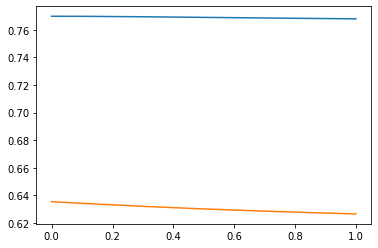

In [171]:
plt.plot(alpha, training_accuracy)
plt.plot(alpha, test_accuracy)
#가장 처음이 가장 최적화가 되있는 부분 영상이랑 많이 다름;;

In [175]:
#언제 최대인지 정확히 알려면? 영상참조가 좀 더 눈에 잘 띈다
np.argmax(test_accuracy) #이건 눈으로 봐도 0일 떄 가장 최대이다

0

In [174]:
alpha[0] #알파값은 따론 정해진 값이 아니다, 해보면서 찾는 것

0.0

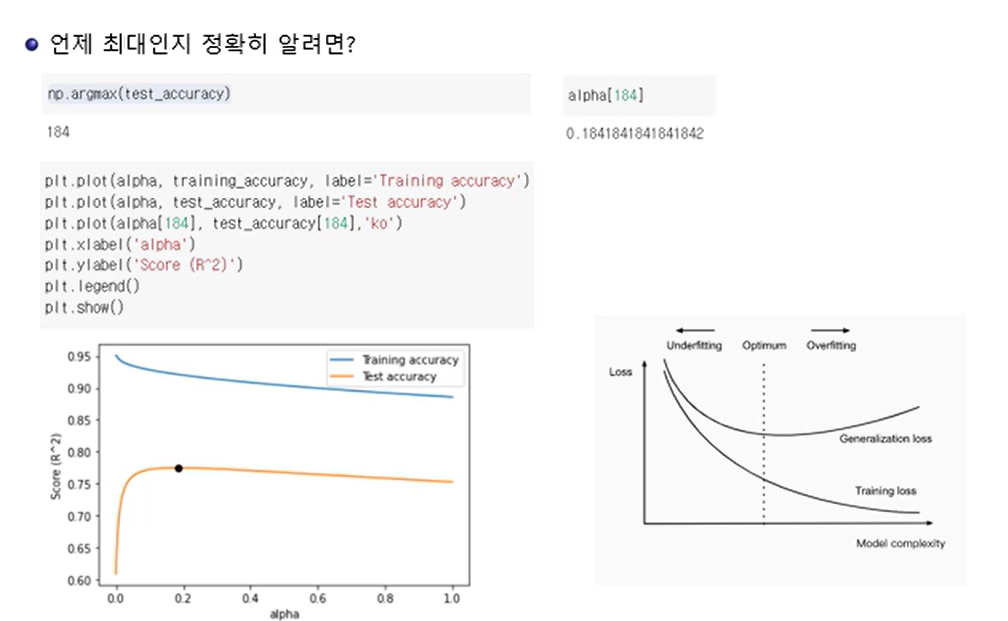

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

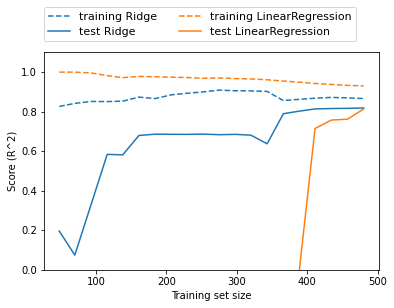

In [181]:
#sample수에 따른 accuracy그리기
#학습 곡선(learning curve)
mglearn.plots.plot_ridge_n_samples()

# train data에서 정확도는 linearRegression이 확실히 더 좋다 

# = linear 모델이 Ridge보다 좋다

#test data의 경우는 정확도가 Ridge가 더 높다

#sample 수가 늘어 날 수록, test set에서 accuracy가 높아진다

# **W의 값 비교**
# Alpha가 클수록 0근처로 W가 수렴한다

In [199]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

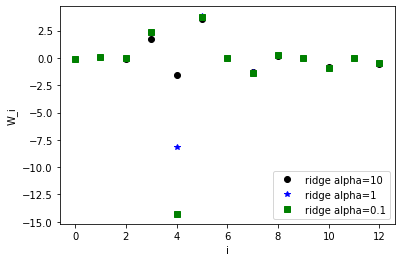

In [200]:
plt.plot(ridge10.coef_,'ko', label='ridge alpha=10')
plt.plot(ridge1.coef_,'b*', label='ridge alpha=1')
plt.plot(ridge01.coef_,'gs', label='ridge alpha=0.1')
#plt.plot(lr.coef_,'rv', label='Linear Regression')
plt.xlabel('i')
plt.ylabel('W_i')
plt.legend() #범례 그래프에 데이터 종류 표시하는 텍스트
plt.show() #영상엔 훨씬 많은데 왜이리 적은지 모르겠음

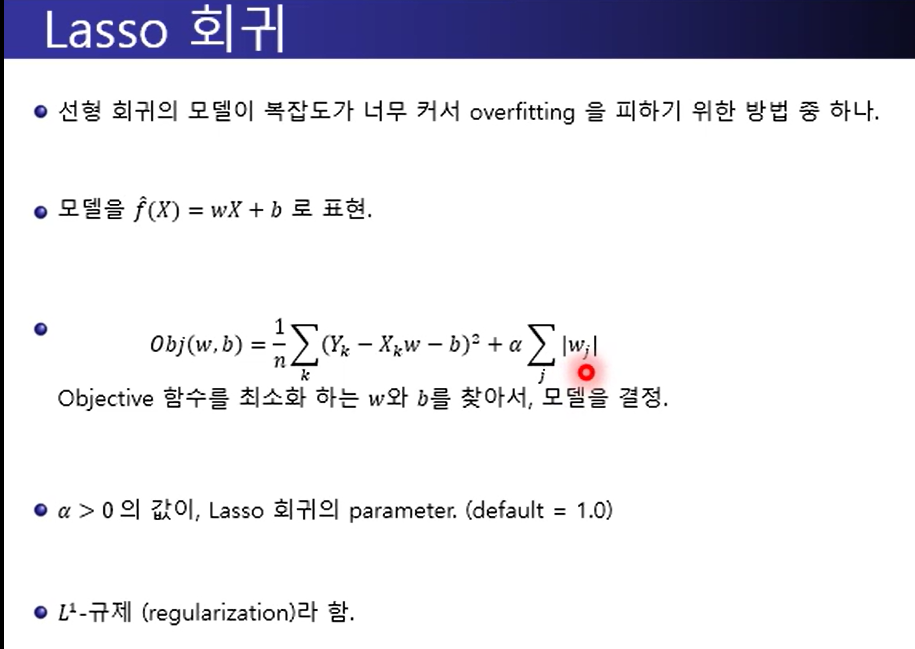

릿지 회귀는 w에 제곱이었다면

# 라쏘회귀는 절댓값 (둘다 음수를 막기 위함)

절댓값과 제곱은 그 비중이 다르다

차이 : 라쏘에서는 w중에 0이 되는 항들이 등장한다

타켓과 큰 상관없는 feature을 무시해버림

특성선택이 자동으로 이루어진다는 뜻

자료 해석 측에선 좋을 수 있다 = 필요한게 아니면 날려버리니깐

In [201]:
#model 학습
from sklearn.linear_model import Lasso

In [202]:
lasso = Lasso().fit(X_train, y_train)

In [205]:
#보스턴 데이터셋에 적용
print("train Accuracy : {:.2f}".format(lasso.score(X_train,y_train)))
print("test Accuracy : {:.2f}".format(lasso.score(X_test,y_test))) 
print("number of features used : ", np.sum(lasso.coef_ !=0))
#최적화를 이루진 못했고, 영상에선 weight가 0이 아닌feature가 104개에서 겨우 4개 쓸 뿐이지만
#여기선 13개중에 11개를 쓰니 거의 다 쓰고 있다라고 생각 할 수 있을듯

train Accuracy : 0.72
test Accuracy : 0.55
number of features used :  11


In [206]:
#parameter 세팅 하기.
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("train Accuracy : {:.2f}".format(lasso.score(X_train,y_train)))
print("test Accuracy : {:.2f}".format(lasso.score(X_test,y_test))) 
print("number of features used : ", np.sum(lasso.coef_ !=0))
#조금 더 괜찮아진 것을 확인 가능하다

train Accuracy : 0.76
test Accuracy : 0.61
number of features used :  12


#3개를 통틀어 alpha값이 0.01일 때 비교적 정확하다

In [207]:
lasso = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)
print("train Accuracy : {:.2f}".format(lasso.score(X_train,y_train)))
print("test Accuracy : {:.2f}".format(lasso.score(X_test,y_test))) 
print("number of features used : ", np.sum(lasso.coef_ !=0))
#모든 feature을 활용하는 모습 그리고 최적화도 전보다 더 이루어졌다
#영상에선 104개 중에 33개 활용하는 모습

train Accuracy : 0.77
test Accuracy : 0.63
number of features used :  13


alpha값이 0이면?  Linear regression과 똑같다

alpha값이 매우 작을 경우
경사 하강법의 수렴이 늦어져서 max_iteraion값을 크게 해야한다

In [210]:
lasso = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print("train Accuracy : {:.2f}".format(lasso.score(X_train,y_train)))
print("test Accuracy : {:.2f}".format(lasso.score(X_test,y_test))) 
print("number of features used : ", np.sum(lasso.coef_ !=0))
#이 경우에 영상에선 train정확도 값이 0.95가 되면서 선형회귀랑 같아짐
#엉상에서 feature수는 96개를 사용함

train Accuracy : 0.77
test Accuracy : 0.64
number of features used :  13


# 결과 비교하기 (Lasso, Ridge, Linear Regression)



In [211]:
lasso = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)
print("train Accuracy : {:.2f}".format(lasso.score(X_train,y_train)))
print("test Accuracy : {:.2f}".format(lasso.score(X_test,y_test))) 
print("number of features used : ", np.sum(lasso.coef_ !=0))
#영상은 train = 0.90, test = 0.77, 사용 픽쳐 수 = 33

train Accuracy : 0.77
test Accuracy : 0.63
number of features used :  13


In [212]:
print("train Accuracy : {:.4f}".format(ridge.score(X_train,y_train))) 
print("test Accuracy : {:.4f}".format(ridge.score(X_test,y_test)))
#영상은 train = 0.8858, test = 0.7528

train Accuracy : 0.7679
test Accuracy : 0.6266


In [213]:
print("train Accuracy : {:.2f}".format(lr.score(X_train,y_train))) 
print("test Accuracy : {:.2f}".format(lr.score(X_test,y_test))) 
#영상은 train = 0.95 , test = 0.61

train Accuracy : 0.77
test Accuracy : 0.64


# Lasso, alpha값이 다를 때 비교하기
# 위에 참조

# alpha값이 클수록, 무시되는 feature들이 많아진다
이는 모델해석 측면에 도움이 된다

# alpha값을 적당히 조절해서, test accuracy가 최대한 커지도록 해야한다

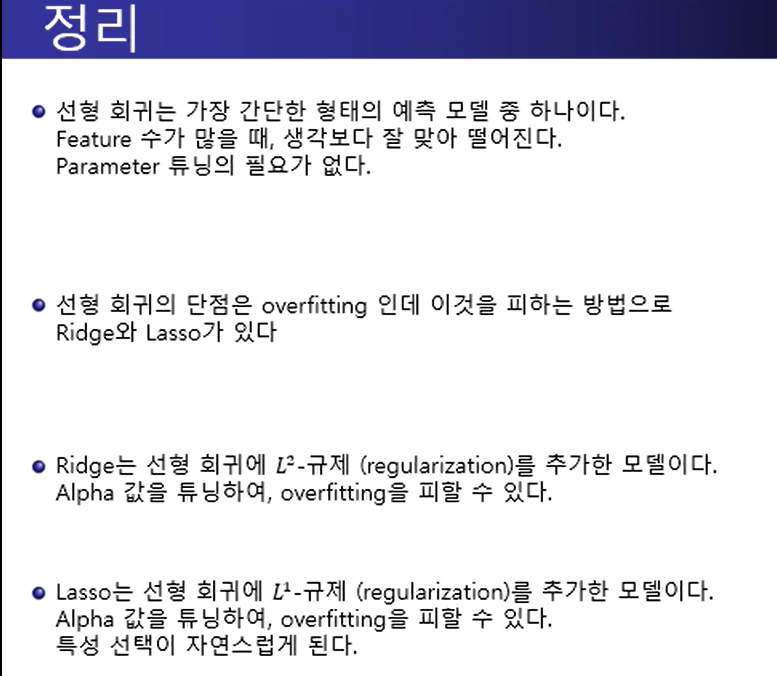

# **분류형 선형 모델**

# y라는 결과물이 a라는 데이터와 b라는 데이터로 나올 때 어떤 것이 a인지 어떤 것이 b인지 분류해주는 것을 분류형 선형 모델이라고 하고 지금 껏 사용한 선형모델을 그대로 사용한다

# y값이 0또는 뭐, 이것 또는 저것 이렇게 분류가 되어 나올 수 있도록 바꿔준다.

# ^f(X) = wX+b인 함수에서 ^f(X) = 0인 점들이, 결정 경계가 됨

# 결과물인 f(X) or Y가 0인지 0보다 큰지 작은지 분류를 하는 것을 한다 0인 점들이 **결정 경계**

# 적당한 **결정 경계**를 구하는 것이 분류에서 정확도의 핵심이다

**훈련 과정**

**1.분류 정확도**

**2.규제(regularization)**

**1, 2를 통하여 w, b를 결정**

# **로지스틱 회귀 모델**

# **영상에서와 같이 0에서 1로 바뀐다!!!!!!!**

#0에서 1로가는 값들은 작은 영역에 분포하고 있고 거의 0이거나 거의 1에 근접되어 있다

#그렇기에 0이면 어떤분류, 1이면 어떤분류 이렇게 나눌 수 있게 된다!

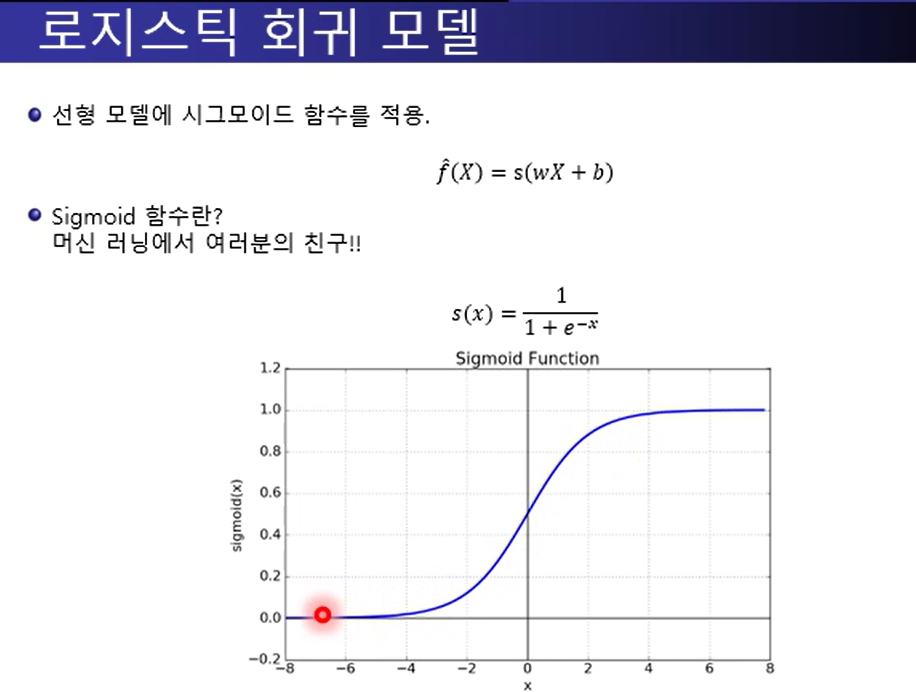

# sigmoid 함수의 치역은 [0,1] 사이, 0과 1사이

# ^f(X)의 값이 너무 커지는 것을 막아준다

# Y값이 0또는 1인데, ^f(X)의 값이 너무 크면 오히려 정확도가 떨어진다고 한다

# **손실 함수**
#  이진 분류에선 logistic 손실 함수를 사용한다 : 0과1

#  다중 분류에선 크로스 엔트로피 손실 함수를 사용한다 : 붓꽃의 종류(답이 한개로 국한되지 않는 형태)






-------------------------------------------------

#**이진분류** : yi는 i번째 샘플의 실제 값, ^yi는 i번째 샘플에 대한 예측값


# i번째 샘플에 대해서 만약 yi = 1이면 loss 함수가 -log(^yi)임


#이때, ^yi = 1이면 loss = 0 이고 ^yi≒0 이면 -log(^yi)가 엄청나게 큰 값이 된다

#**다중분류** 다중분류 로지스틱 회귀 모델
**0과1로만 구분할 수 없다**

#class를 **one-hot encoding**으로 표현한다

#Y가 3개의 값으로 분류 될 때. 각각의 값을 크기 1인 3개의 vector로 표현함

#Y: (1,0,0) , (0,1,0) , (0,0,1)

#Y: (1,0,0,0,0) , (0,1,0,0,0) , (0,0,1,0,0) , (0,0,0,1,0) , (0,0,0,0,1)

얘는 1인 5개의 벡터

#다중 분류에선 ^f(X) = s(wX+b)의 형태가 어떻게 되어야 할까?

#Y와 똑같은 크기의 vector가 되어야 한다.(크기 1인 vector로 가정하자)

#**1)^f(X) = (p1, p2, p3) 꼴이 되어야 함**

#**2)p1,p2,p3 ＞= 0 (0보다 작거나 같다)**

#**3)p1 + p2 + p3 = 1**

#^f(X) = (p1,p2,p3)를 통한 classification

# p1,p2,p3 중 가장 큰 값이 p1이면, 첫번째 클래스

# p1,p2,p3 중 가장 큰 값이 p2이면, 두번째 클래스

# p1,p2,p3 중 가장 큰 값이 p3이면, 세번째 클래스

# **Softmax**

#**또 다른 머신러닝의 친구!!!**

# sigmoid는 0또는 1이기에 합이 1이라는 조건을 만족할 수가 없다 그래서 다중 분류는 softmax가 적합

**그래서 얘는 표현도 전체합을 구하게 표현되었다**

#**1)^f(X) = (p1, p2, p3) 꼴이 되어야 함**

#**2)p1,p2,p3 ＞= 0 (0보다 작거나 같다)**

#**3)p1 + p2 + p3 = 1**

# 이진분류에선 sigmoid면 충분 다중에선 softmax필요!

#**softmax(X)가 아래를 만족 함.**

#1)softmax(X)는 크기 p인 vector

# 2)각각의 entry값이 0 이상

# 3)모든 entry값을 합치면 1

# **다중 분류 로지스틱 회귀**

# 1.wX+b를 계산

# 2.softmax 함수를 적용. ^f(X) = softmax(wX+b)

**softmax를 넣음으로써 확률적인 값으로 바꿔버림**

# 3.분류 : ^f(X)에서 가장 큰 확률 값을 갖고 있는 entry를 찾음

# **예시)**

# Y = (1,0,0) 인데, ^Y = ^f(X) = (0.8, 0.1, 0.1)이면 정확한 분류 80%

# Y = (1,0,0) 인데, ^Y = ^f(X) = (0.4, 0.5, 0.1)이면 틀린 분류 40% 50%가 나오니까 뭐가 뭔지 정확하게 모름

# 그렇다면 손실 함수를 어떻게 정의할까? 이게 또 다른 포인트

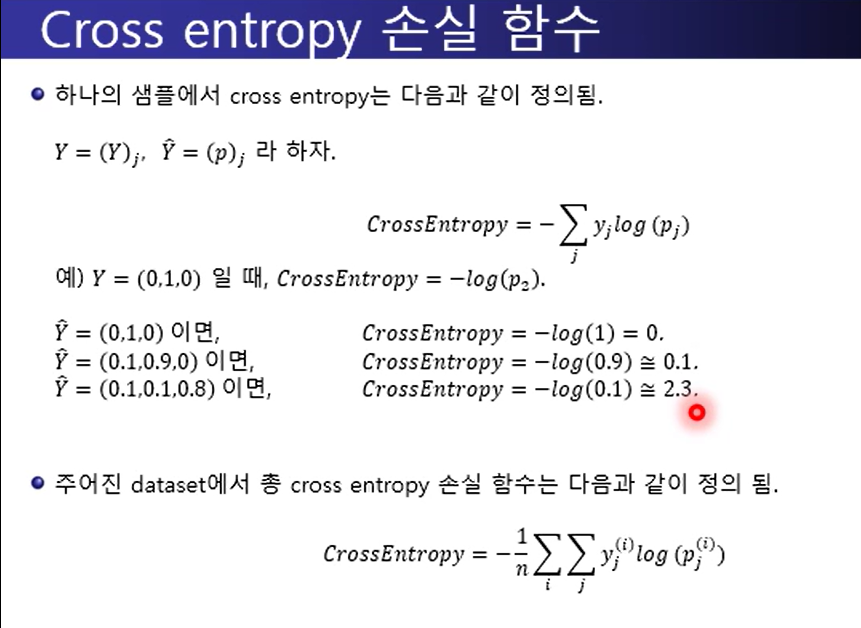


**예시 1번은 정확한 예측**

**예시 2번도 정확한 예측**

**예시 3번은 잘못 예측 loss수치가 커진다.**

# **로지스틱 회귀의 학습**

**어떻게 하나?**

# 경사하강법으로 학습된다.

# sklearn에서 구현되있다!!!

# **sklearn으로 구현**

**1차원 data를 예로 사용**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


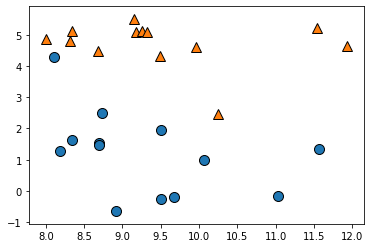

In [221]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()
#오렌지와 파란색의 경계로써 분류 가능

In [222]:
#model 불러오기 및 train하기
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

# 결정 경계 그리기

**직선 아래는 0으로 위는 1로 분류된다.**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


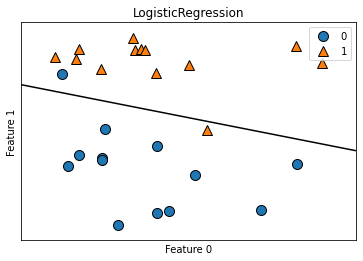

In [224]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5)
plt.title('LogisticRegression')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

In [225]:
#점수 계산하기, 얼마나 분류가 잘 되었는지 확인
print("score : {:.3f}".format(clf.score(X,y)))

score : 0.923


# **로지스틱 회귀의 규제**

# 로지스틱 회귀는 L^2 규제를 사용한다

# 매개 변수는 C

# 매개 변수 C의 기본값은 1

# C가 높아질수록 규제가 감소하고 C가 낮아질수록 규제가 증가한다

# **유방암 dataset**

In [226]:
from joblib.numpy_pickle_compat import load_compatibility
#dataset가져오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [227]:
print(cancer.DESCR) #569의 개체, 30개의 결과물 그 밖의 내용들 크기, 모양, 사이즈, 면적, 텍스쳐 등등

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [228]:
#dataset 형태
cancer.data.shape

(569, 30)

In [229]:
cancer.target.shape

(569,)

In [230]:
cancer.feature_names #이거 예전에 유방암 예제 불러오기 해본거임

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [231]:
#train/test 분리
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#Stratify는 y의 class값을 train/test set에서도 유지하는 option

In [234]:
#LogisticRegression 모델 만들어 훈련하기
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

In [235]:
#점수계산
print("train score : {:.3f}".format(logreg.score(X_train,y_train))) 
print("test score : {:.3f}".format(logreg.score(X_test,y_test)))
#둘 다 높고 좋은 수치

train score : 0.958
test score : 0.958


In [236]:
#C값 바꾸기 디폴트 값 1이었음, 규제의 성향도 보이고 오버피팅도 없음
logreg10000 = LogisticRegression(C=10000, max_iter=100000).fit(X_train, y_train)
print("train score : {:.3f}".format(logreg10000.score(X_train,y_train))) 
print("test score : {:.3f}".format(logreg10000.score(X_test,y_test)))

train score : 0.984
test score : 0.979


In [237]:
logreg1000 = LogisticRegression(C=1000, max_iter=100000).fit(X_train, y_train)
print("train score : {:.3f}".format(logreg1000.score(X_train,y_train))) 
print("test score : {:.3f}".format(logreg1000.score(X_test,y_test)))

train score : 0.986
test score : 0.986


In [238]:
logreg10 = LogisticRegression(C=10, max_iter=100000).fit(X_train, y_train)
print("train score : {:.3f}".format(logreg10.score(X_train,y_train))) 
print("test score : {:.3f}".format(logreg10.score(X_test,y_test)))

train score : 0.967
test score : 0.965


In [240]:
logreg1 = LogisticRegression(C=1, max_iter=100000).fit(X_train, y_train)
print("train score : {:.3f}".format(logreg1.score(X_train,y_train))) 
print("test score : {:.3f}".format(logreg1.score(X_test,y_test)))
#디폴트 값이 1인데 1로 지정했으니 처음값이랑 같게 나올거임

train score : 0.958
test score : 0.958


In [239]:
logreg0000001 = LogisticRegression(C=0.000001, max_iter=100000).fit(X_train, y_train)
print("train score : {:.3f}".format(logreg0000001.score(X_train,y_train))) 
print("test score : {:.3f}".format(logreg0000001.score(X_test,y_test)))

train score : 0.908
test score : 0.923


In [242]:
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
logreg1 = LogisticRegression(C=1, max_iter=100000).fit(X_train, y_train)
logreg0001 = LogisticRegression(C=0.001, max_iter=100000).fit(X_train, y_train)

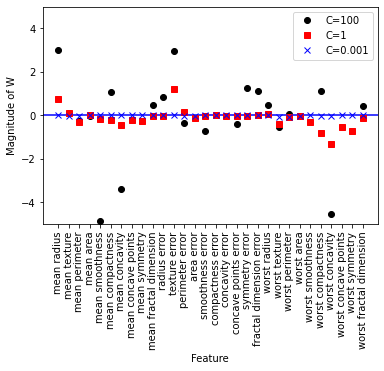

In [251]:
#W값 비교
plt.plot(logreg100.coef_.T, 'ko', label='C=100')
plt.plot(logreg1.coef_.T, 'rs', label='C=1')
plt.plot(logreg0001.coef_.T, 'bx', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1], 'b')
plt.xlim(xlims)
plt.ylim(-5,5)
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Magnitude of W')
plt.show() #C가 클수록 W의 범위가 커진다.

# L^1 규제 사용하기

In [255]:
lr_l1 = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=10000).fit(X_train,y_train)
print("train score : {:.3f}".format(lr_l1.score(X_train,y_train)))
print("test score : {:.3f}".format(lr_l1.score(X_test,y_test))) 
print("number of features used : ", sum(sum(lr_l1.coef_ !=0)))

train score : 0.960
test score : 0.958
number of features used :  10


train accuracy of Logistic Regression with C=0.001 : 0.913
test accuracy of Logistic Regression with C=0.001 : 0.923
train accuracy of Logistic Regression with C=1.000 : 0.960
test accuracy of Logistic Regression with C=1.000 : 0.958
train accuracy of Logistic Regression with C=100.000 : 0.986
test accuracy of Logistic Regression with C=100.000 : 0.979


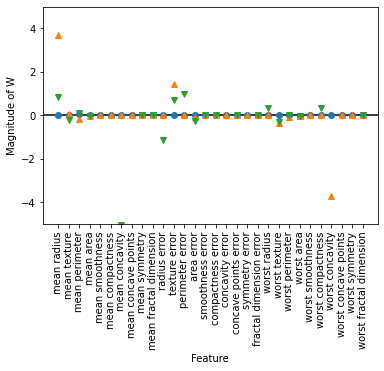

In [257]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']): #for문으로 한꺼번에 하는거
  lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=10000).fit(X_train,y_train)
  print("train accuracy of Logistic Regression with C={:.3f} : {:.3f}".format(C, lr_l1.score(X_train,y_train)))
  print("test accuracy of Logistic Regression with C={:.3f} : {:.3f}".format(C, lr_l1.score(X_test,y_test)))

  plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('Feature')
plt.ylabel('Magnitude of W')
plt.ylim(-5,5)
plt.show() #C가 0.001인경우 1인경우 100인경우 다 나옴
#규제가 크니까 좀 좋아보인다고 함